### Z-Score Technique

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

df = load_wine(as_frame = True)
df = df.data
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


*This method assumes that the underlying distribution is normal*

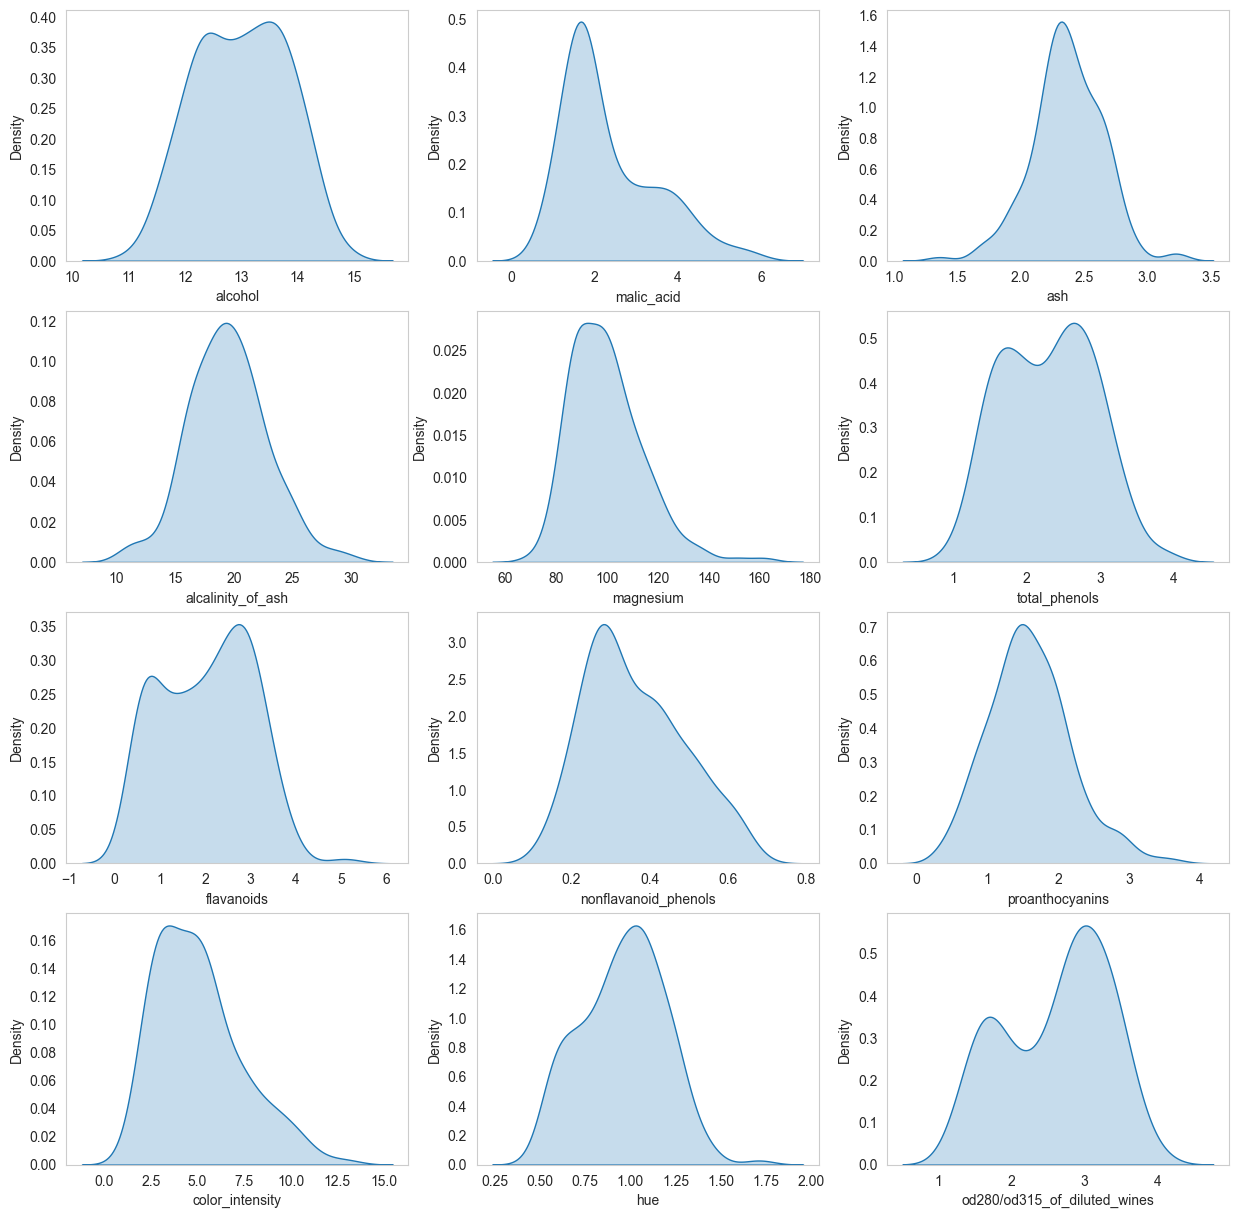

In [48]:
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize = (15, 15))
for i in range(4):
    for j in range(3):
        sns.kdeplot(data = df.iloc[:, i * 3 + j], ax = ax[i, j], fill = True)
        ax[i, j].grid(False)
plt.show()

*Let's now examine the `ash` column more closely.*

In [49]:
df['ash'].skew()

np.float64(-0.17669931645735712)

In [50]:
df['ash'].describe()

count    178.000000
mean       2.366517
std        0.274344
min        1.360000
25%        2.210000
50%        2.360000
75%        2.557500
max        3.230000
Name: ash, dtype: float64

In [51]:
# Finding the boundary values -> 68-95-99 Rule
print("Highest allowed", df['ash'].mean() + 3*df['ash'].std())
print("Lowest allowed", df['ash'].mean() - 3*df['ash'].std())

Highest allowed 3.189548881115029
Lowest allowed 1.54348482675014


In [52]:
df.shape

(178, 13)

In [53]:
# Finding the outliers
df[(df['ash'] > 3.18) | (df['ash'] < 1.54)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0


### Trimming the Outliers

In [54]:
outliers = df[(df['ash'] > 3.18) | (df['ash'] < 1.54)]
df = df.drop(index = outliers.index)
df.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0
77,11.84,2.89,2.23,18.0,112.0,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500.0
40,13.56,1.71,2.31,16.2,117.0,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795.0
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0
81,12.72,1.81,2.20,18.8,86.0,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714.0


---

### Approach 2 - Calculating the Zscore

In [55]:
df = load_wine(as_frame = True)
df = df.data
df.head()

df['ash_zscore'] = (df['ash'] - df['ash'].mean())/df['ash'].std()
df['ash_zscore'].sample(5)

174    0.413653
166    0.851060
175   -0.388260
86    -0.206007
95    -0.606964
Name: ash_zscore, dtype: float64

*Standardization results in a mean of 0 and a standard deviation of 1 for the standard normal variate.*

In [56]:
df[df['ash_zscore'] > 3]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,ash_zscore
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0,3.110996
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,3.147447


In [57]:
df[df['ash_zscore'] < -3]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,ash_zscore
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,-3.668813


In [58]:
# Outliers Detection
df[(df['ash_zscore'] > 3) | (df['ash_zscore'] < -3)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,ash_zscore
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0,3.110996
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,-3.668813
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,3.147447


### Capping the Outliers

In [59]:
upper_limit = df['ash'].mean() + 3*df['ash'].std()
lower_limit = df['ash'].mean() - 3*df['ash'].std()

print("Highest allowed", upper_limit)
print("Lowest allowed", lower_limit)

Highest allowed 3.189548881115029
Lowest allowed 1.54348482675014


In [60]:
df['ash'] = np.clip(a = df['ash'], a_min = lower_limit, a_max = upper_limit)

In [61]:
df['ash'].describe()

count    178.000000
mean       2.367149
std        0.269618
min        1.543485
25%        2.210000
50%        2.360000
75%        2.557500
max        3.189549
Name: ash, dtype: float64